<a href="https://colab.research.google.com/github/rishiraj824/MachineLearningAlgorithms/blob/master/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

transforms = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406],
  [0.229, 0.224, 0.225])
])

train_dir = "/content/drive/My Drive/Colab Notebooks/data/data/train"
val_dir = "/content/drive/My Drive/Colab Notebooks/data/data/val"

train_set = datasets.ImageFolder(train_dir, transforms)
val_set = datasets.ImageFolder(val_dir, transforms)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=8,
                                           shuffle=True, num_workers=0)

val_loader = torch.utils.data.DataLoader(val_set, batch_size=8,
                                          shuffle=True, num_workers=0)

dataloaders = {
    'train': train_loader,
    'val': val_loader
}
dataset_sizes = { 'train': len(train_loader.dataset), 'val': len(val_loader.dataset) }
class_names = train_set.classes

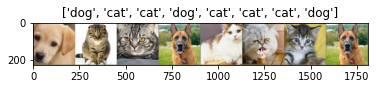

Epoch 0/19
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.7785 Acc: 0.4667
val Loss: 0.3751 Acc: 0.9167
Epoch 1/19
----------
train Loss: 0.4716 Acc: 0.7667
val Loss: 0.1727 Acc: 1.0000
Epoch 2/19
----------
train Loss: 0.2824 Acc: 0.9167
val Loss: 0.0695 Acc: 1.0000
Epoch 3/19
----------
train Loss: 0.1288 Acc: 0.9667
val Loss: 0.1223 Acc: 0.9583
Epoch 4/19
----------
train Loss: 0.0661 Acc: 1.0000
val Loss: 0.0349 Acc: 1.0000
Epoch 5/19
----------
train Loss: 0.1007 Acc: 0.9500
val Loss: 0.0285 Acc: 1.0000
Epoch 6/19
----------
train Loss: 0.1130 Acc: 0.9833
val Loss: 0.0277 Acc: 1.0000
Epoch 7/19
----------
train Loss: 0.0978 Acc: 0.9667
val Loss: 0.0256 Acc: 1.0000
Epoch 8/19
----------
train Loss: 0.0437 Acc: 1.0000
val Loss: 0.0265 Acc: 1.0000
Epoch 9/19
----------
train Loss: 0.0584 Acc: 0.9833
val Loss: 0.0259 Acc: 1.0000
Epoch 10/19
----------
train Loss: 0.0647 Acc: 0.9833
val Loss: 0.0253 Acc: 1.0000
Epoch 11/19
----------
train Loss: 0.0406 Acc: 1.0000
val Loss: 0.0248 Acc: 1.0000
Epoch 12/19
----------
train Loss: 0

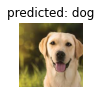

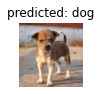

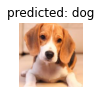

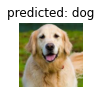

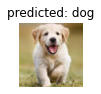

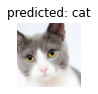

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# parameters
batch_size = 8
num_epochs = 20

train_loss = []
val_loss = []
all_accuracy = []

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(5)  # pausing for a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


import torchvision.models as models

resnet34 = models.resnet34(pretrained=True)

Loss = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(resnet34.parameters(), lr=0.001, momentum=0.9)

def train_model(model, Loss, optimizer, scheduler, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        ik = 0
        # Each epoch has a training and val phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                  # forward
                  outputs = model(inputs)
                  loss = Loss(outputs, labels)

                  _, preds = torch.max(outputs.data, 1)
                  ik += 1
                  # backward + optimize only if in training phase
                  if phase == 'train':
                      loss.backward()
                      optimizer.step()

                # statistics of training
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
              train_loss.append(running_loss)
            elif phase == 'val':
              val_loss.append(running_loss)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


model_conv = torchvision.models.resnet34(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

Loss = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


model_conv = train_model(model_conv, Loss, optimizer_conv,
                         exp_lr_scheduler, num_epochs)


def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data

        inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                model.train(mode=was_training)
                return
    model.train(mode=was_training)

visualize_model(model_conv)


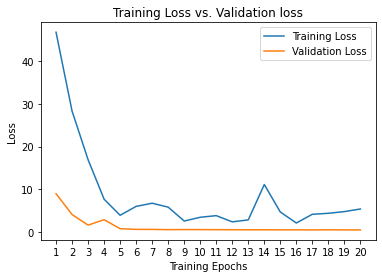

In [5]:
plt.title("Training Loss vs. Validation loss")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(range(1,num_epochs+1),train_loss,label="Training Loss")
plt.plot(range(1,num_epochs+1),val_loss,label="Validation Loss")
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()